In [1]:
from scipy import stats
from sklearn.linear_model import LinearRegression
from statsmodels.compat import lzip
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from scipy import stats
from statsmodels.compat import lzip
import statsmodels

In [2]:
df_pew = pd.read_csv("data/PEWDIEPIE_video_data_UP.csv")
df_mrbeast = pd.read_csv("data/MRBEAST_video_data_UP.csv")
df_mrbeast2 = pd.read_csv("data/MRBEAST2_video_data_UP.csv")
df_boom = pd.read_csv("data/DaFuqBoom_video_data_UP.csv")
df_5min = pd.read_csv("data/5minCrafts_video_data_UP.csv")
df_org = pd.read_csv("data/org_video_data_UP.csv")
df_coco = pd.read_csv("data/COCOMELO_video_data_UP.csv")

In [3]:
df_mrbeast2

,Unnamed: 0,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,pushblishDayName,durationSecs,tagsCount,likeRatio,commentRatio,titleLength
0,0,RKT7xqPDy74,MrBeast 2,"I Asked Mark Cuban For $1,000,000",NaN,NaN,2023-10-22 17:00:00+00:00,13735868,990258,NaN,3927,PT19S,hd,False,Sunday,19.0,0,72.092859,0.285894,33
1,1,SHOV58tdNiI,MrBeast 2,Miranda Cosgrove Said What?,NaN,NaN,2023-10-15 17:00:00+00:00,57338629,3562307,NaN,21805,PT15S,hd,False,Sunday,15.0,0,62.127523,0.380285,27
2,2,SGzWIoLAzmY,MrBeast 2,"Feeding A Cat $10 Vs $10,000 Sushi",NaN,NaN,2023-08-31 17:00:00+00:00,145417200,7194440,NaN,16227,PT31S,hd,False,Thursday,31.0,0,49.474478,0.111589,34
3,3,sHX6pzhdCP0,MrBeast 2,"$30,000 Relay Race",Play Stumble Guys Now!:\n\nhttps://stumbleguys...,NaN,2023-08-13 17:20:26+00:00,6501124,471223,NaN,2527,PT42S,hd,False,Sunday,42.0,0,72.483312,0.388702,18
4,4,ykRq_rp7NhM,MrBeast 2,I Got Naruto to Subscribe to Me,NaN,NaN,2023-05-20 20:00:00+00:00,127882331,6737523,NaN,15606,PT20S,hd,True,Saturday,20.0,0,52.685331,0.122034,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,110,wdznN3-h_5Y,MrBeast 2,"Launching a $40,000 Firework!","We launched a $40,000 firework and it was insa...",NaN,2020-09-11 19:14:35+00:00,11567603,675796,NaN,12118,PT24S,hd,False,Friday,24.0,0,58.421438,1.047581,29
111,111,h-EL3eeSZeU,MrBeast 2,Unlimited Money Machine,#Shorts,NaN,2020-08-24 23:31:38+00:00,62731027,2863394,NaN,29403,PT22S,hd,False,Monday,22.0,0,45.645578,0.468715,23
112,112,RBB9GSMkLHc,MrBeast 2,How To Never Lose Rock Paper Scissors Again!,#Shorts,NaN,2020-08-23 22:07:27+00:00,43022260,1933883,NaN,323125,PT14S,hd,False,Sunday,14.0,0,44.950753,7.510647,44
113,113,xdmuHe_ZDIw,MrBeast 2,World's Longest Whopper Train! LOL,We did the funny... subscribe for more videos!...,NaN,2020-08-21 21:48:56+00:00,72401695,1141783,NaN,8835,PT15S,hd,False,Friday,15.0,0,15.770114,0.122028,34


In [4]:
df_list = [df_pew, df_mrbeast, df_mrbeast2, df_boom, df_5min, df_org, df_coco]
df = pd.concat(df_list)
df

,Unnamed: 0,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,pushblishDayName,durationSecs,tagsCount,likeRatio,commentRatio,titleLength
0,0,L0zminwWyxI,PewDiePie,I Learned 7 things in 7 days (to impress my son),#AD - 🌏 Get exclusive NordVPN deal here ➵ http...,"['pewdiepie', 'pewds', 'pewdie']",2023-10-12 17:00:26+00:00,1710094.0,126487.0,NaN,4662.0,PT25M22S,hd,False,Thursday,0 days 00:25:22,3,73.964940,2.726166,48
1,1,CZy5pwKdMuo,PewDiePie,This is the best,🧎#Subscribe🧎\n\nStock Up On ➡️🥤Gfuel (affiliat...,"['pewdiepie', 'pewds', 'pewdie']",2023-10-04 17:15:00+00:00,3246865.0,254979.0,NaN,8756.0,PT13M56S,hd,False,Wednesday,0 days 00:13:56,3,78.530829,2.696755,16
2,2,ZFAuSU_XaZI,PewDiePie,The worst Hoarder on the Planet.,#AD - Get exclusive NordVPN deal here ➵ https:...,"['pewdiepie', 'pewds', 'pewdie']",2023-09-30 17:15:02+00:00,1565181.0,83114.0,NaN,2727.0,PT14M40S,hd,False,Saturday,0 days 00:14:40,3,53.101846,1.742291,32
3,3,sK37SolFV8I,PewDiePie,i am now supreme leader,Get exclusive NordVPN deal here ➵ https://Nord...,"['pewdiepie', 'pewds', 'pewdie']",2023-09-22 16:48:14+00:00,1656353.0,120863.0,NaN,4658.0,PT17M26S,hd,False,Friday,0 days 00:17:26,3,72.969349,2.812202,23
4,4,_sPXXL9YXok,PewDiePie,dad life,Shop my OFFICIAL merch collection: https://bit...,"['pewdiepie', 'pewds', 'pewdie']",2023-09-15 15:54:58+00:00,3819122.0,251765.0,NaN,8711.0,PT27M56S,hd,False,Friday,0 days 00:27:56,3,65.922220,2.280891,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,1017,tVpgEiBcw7M,Cocomelon - Nursery Rhymes,"Learn the ABCs: ""P"" is for Pig and Penguin","Featuring the letter ""P""! \nThis series goes t...","['baby songs', 'sing-along', 'abckidtv', 'pres...",2007-06-20 03:41:46+00:00,9765764.0,5077.0,NaN,0.0,PT1M31S,sd,False,Wednesday,0 days 00:01:31,15,0.519877,0.000000,42
1018,1018,7W6fEFixi5U,Cocomelon - Nursery Rhymes,"Learn the ABCs: ""L"" is for Lion and Ladybug","Featuring the letter ""L""! \nThis series goes t...","['baby songs', 'kids education', 'kindergarten...",2007-06-20 03:34:33+00:00,24753403.0,21503.0,NaN,0.0,PT1M48S,sd,False,Wednesday,0 days 00:01:48,15,0.868689,0.000000,43
1019,1019,cgC8BC1OINQ,Cocomelon - Nursery Rhymes,"Learn the ABCs: ""K"" is for Kangaroo","Featuring the letter ""K""! \nThis series goes t...","['cocomelon', 'kids entertainment', 'kindergar...",2007-06-20 01:31:32+00:00,8865285.0,4567.0,NaN,0.0,PT2M13S,sd,False,Wednesday,0 days 00:02:13,15,0.515155,0.000000,35
1020,1020,0fw3l1z9CUQ,Cocomelon - Nursery Rhymes,ABC Song with Cute Ending,This ABC Song is one of the most popular ABC s...,"['toddler', 'children songs', 'abckidtv', 'kid...",2006-09-02 01:34:53+00:00,298119514.0,332847.0,NaN,0.0,PT45S,sd,False,Saturday,0 days 00:00:45,15,1.116488,0.000000,25


In [5]:
pew_high = df_pew['likeCount'].quantile(0.99)
pew_low = df_pew['likeCount'].quantile(0.01)
pew_like = df_pew[(df_pew['likeCount']<pew_high) & (df_pew['likeCount']>pew_low) & (df_pew['likeCount']>50)]

mrbeast_high = df_mrbeast['likeCount'].quantile(0.99)
mrbeast_low = df_mrbeast['likeCount'].quantile(0.01)
mrbeast_like = df_mrbeast[(df_mrbeast['likeCount']<mrbeast_high) & (df_mrbeast['likeCount']>mrbeast_low) & (df_mrbeast['likeCount']>50)]

mrbeast2_high = df_mrbeast2['likeCount'].quantile(0.99)
mrbeast2_low = df_mrbeast2['likeCount'].quantile(0.01)
mrbeast2_like = df_mrbeast2[(df_mrbeast2['likeCount']<mrbeast2_high) & (df_mrbeast2['likeCount']>mrbeast2_low) & (df_mrbeast2['likeCount']>50)]

coco_high = df_coco['likeCount'].quantile(0.99)
coco_low = df_coco['likeCount'].quantile(0.01)
coco_like = df_coco[(df_coco['likeCount']<coco_high) & (df_coco['likeCount']>coco_low) & (df_coco['likeCount']>50)]

fmin_high = df_5min['likeCount'].quantile(0.99)
fmin_low = df_5min['likeCount'].quantile(0.01)
fmin_like = df_5min[(df_5min['likeCount']<fmin_high) & (df_5min['likeCount']>fmin_low) & (df_5min['likeCount']>50)]

org_high = df_org['likeCount'].quantile(0.99)
org_low = df_org['likeCount'].quantile(0.01)
org_like = df_org[(df_org['likeCount']<org_high) & (df_org['likeCount']>org_low) & (df_org['likeCount']>50)]

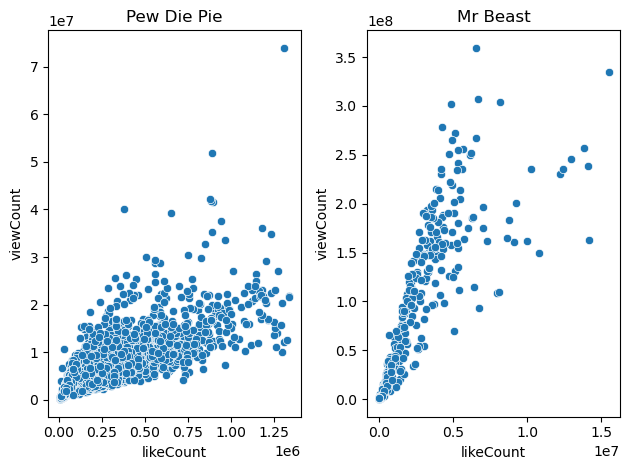

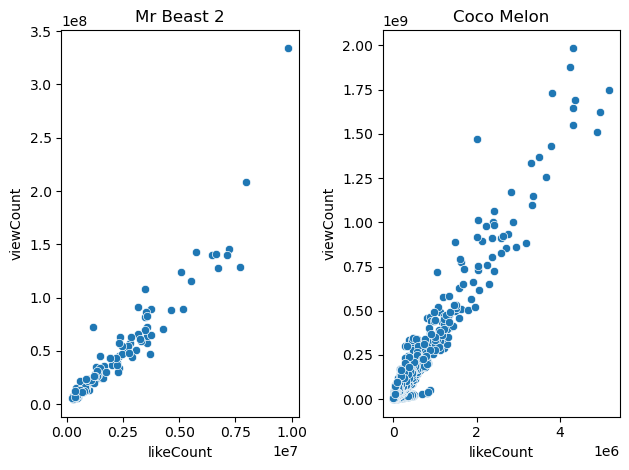

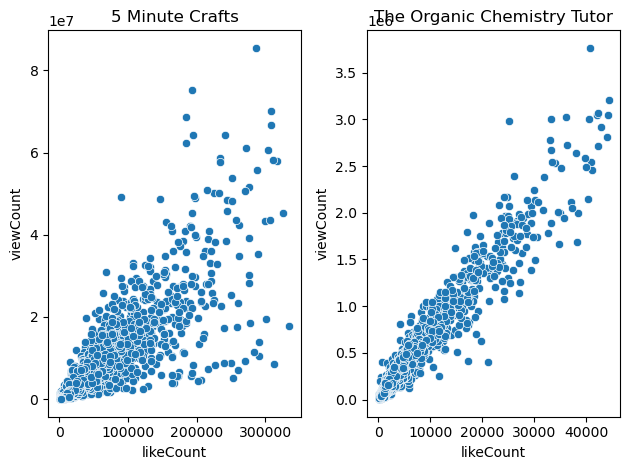

In [6]:
fig0, ax0 = plt.subplots(1, 2)
sns.scatterplot(data=pew_like, x = 'likeCount', y='viewCount', ax = ax0[0]).set(title='Pew Die Pie')
sns.scatterplot(data=mrbeast_like, x = 'likeCount', y='viewCount', ax = ax0[1]).set(title='Mr Beast')
fig0.tight_layout()

fig1, ax1 = plt.subplots(1, 2)
sns.scatterplot(data=mrbeast2_like, x = 'likeCount', y='viewCount', ax = ax1[0]).set(title='Mr Beast 2')
sns.scatterplot(data=coco_like, x = 'likeCount', y='viewCount', ax = ax1[1]).set(title='Coco Melon')
fig1.tight_layout()

fig2, ax2 = plt.subplots(1, 2)
sns.scatterplot(data=fmin_like, x = 'likeCount', y='viewCount', ax = ax2[0]).set(title='5 Minute Crafts')
sns.scatterplot(data=org_like, x = 'likeCount', y='viewCount', ax = ax2[1]).set(title='The Organic Chemistry Tutor')
fig2.tight_layout()

In [7]:
pew_high = df_pew['commentCount'].quantile(0.99)
pew_low = df_pew['commentCount'].quantile(0.01)
pew_comment = df_pew[(df_pew['commentCount']<pew_high) & (df_pew['commentCount']>pew_low) & (df_pew['commentCount']>50)]

mrbeast_high = df_mrbeast['commentCount'].quantile(0.99)
mrbeast_low = df_mrbeast['commentCount'].quantile(0.01)
mrbeast_comment = df_mrbeast[(df_mrbeast['commentCount']<mrbeast_high) & (df_mrbeast['commentCount']>mrbeast_low) & (df_mrbeast['commentCount']>50)]

mrbeast2_high = df_mrbeast2['commentCount'].quantile(0.99)
mrbeast2_low = df_mrbeast2['commentCount'].quantile(0.01)
mrbeast2_comment = df_mrbeast2[(df_mrbeast2['commentCount']<mrbeast2_high) & (df_mrbeast2['commentCount']>mrbeast2_low) & (df_mrbeast2['commentCount']>50)]

coco_high = df_coco['commentCount'].quantile(0.99)
coco_low = df_coco['commentCount'].quantile(0.01)
coco_comment = df_coco[(df_coco['commentCount']<coco_high) & (df_coco['commentCount']>coco_low) & (df_coco['commentCount']>50)]

fmin_high = df_5min['commentCount'].quantile(0.99)
fmin_low = df_5min['commentCount'].quantile(0.01)
fmin_comment = df_5min[(df_5min['commentCount']<fmin_high) & (df_5min['commentCount']>fmin_low) & (df_5min['commentCount']>50)]

org_high = df_org['commentCount'].quantile(0.99)
org_low = df_org['commentCount'].quantile(0.01)
org_comment = df_org[(df_org['commentCount']<org_high) & (df_org['commentCount']>org_low) & (df_org['commentCount']>50)]

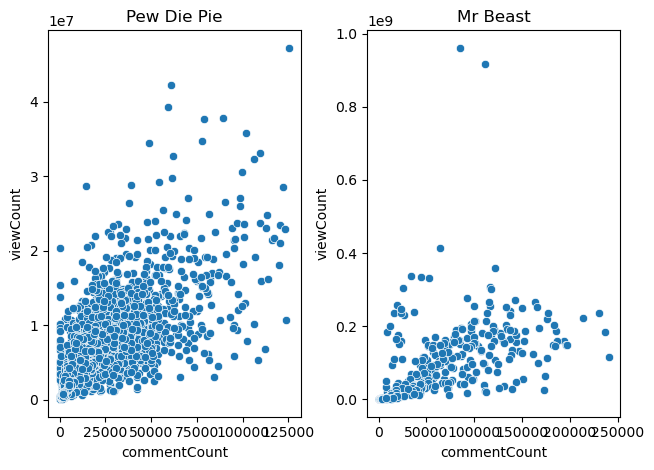

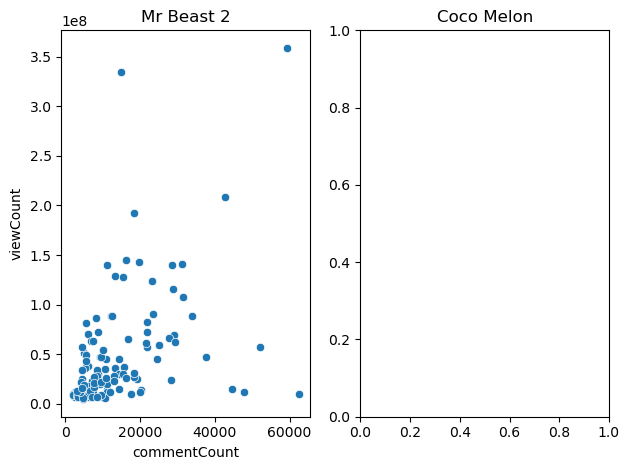

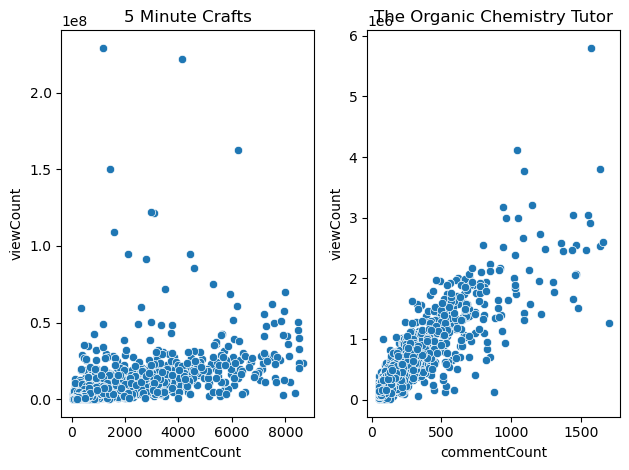

In [8]:
fig0, ax0 = plt.subplots(1, 2)
sns.scatterplot(data=pew_comment, x = 'commentCount', y='viewCount', ax = ax0[0]).set(title='Pew Die Pie')
sns.scatterplot(data=mrbeast_comment, x = 'commentCount', y='viewCount', ax = ax0[1]).set(title='Mr Beast')
fig0.tight_layout()

fig1, ax1 = plt.subplots(1, 2)
sns.scatterplot(data=mrbeast2_comment, x = 'commentCount', y='viewCount', ax = ax1[0]).set(title='Mr Beast 2')
sns.scatterplot(data=coco_comment, x = 'commentCount', y='viewCount', ax = ax1[1]).set(title='Coco Melon')
fig1.tight_layout()

fig2, ax2 = plt.subplots(1, 2)
sns.scatterplot(data=fmin_comment, x = 'commentCount', y='viewCount', ax = ax2[0]).set(title='5 Minute Crafts')
sns.scatterplot(data=org_comment, x = 'commentCount', y='viewCount', ax = ax2[1]).set(title='The Organic Chemistry Tutor')
fig2.tight_layout()

In [51]:
pew_high = df_pew['viewCount'].quantile(0.99)
pew_low = df_pew['viewCount'].quantile(0.01)
pew_comment = df_pew[(df_pew['viewCount']<pew_high) & (df_pew['viewCount']>pew_low) & (df_pew['commentCount']<1000000)]

mrbeast_high = df_mrbeast['viewCount'].quantile(0.99)
mrbeast_low = df_mrbeast['viewCount'].quantile(0.01)
mrbeast_comment = df_mrbeast[(df_mrbeast['viewCount']<mrbeast_high) & (df_mrbeast['viewCount']>mrbeast_low) & (df_mrbeast['commentCount']<1000000)]

mrbeast2_high = df_mrbeast2['viewCount'].quantile(0.99)
mrbeast2_low = df_mrbeast2['viewCount'].quantile(0.01)
mrbeast2_comment = df_mrbeast2[(df_mrbeast2['viewCount']<mrbeast2_high) & (df_mrbeast2['viewCount']>mrbeast2_low) & (df_mrbeast2['commentCount']<1000000)]

coco_high = df_coco['viewCount'].quantile(0.99)
coco_low = df_coco['viewCount'].quantile(0.01)
coco_comment = df_coco[(df_coco['viewCount']<coco_high) & (df_coco['viewCount']>coco_low) & (df_coco['commentCount']<1000000)]

fmin_high = df_5min['viewCount'].quantile(0.99)
fmin_low = df_5min['viewCount'].quantile(0.01)
fmin_comment = df_5min[(df_5min['viewCount']<fmin_high) & (df_5min['viewCount']>fmin_low) & (df_5min['commentCount']<1000000)]

org_high = df_org['viewCount'].quantile(0.99)
org_low = df_org['viewCount'].quantile(0.01)
org_comment = df_org[(df_org['viewCount']<org_high) & (df_org['viewCount']>org_low) & (df_org['commentCount']<1000000)]

boom_high = df_boom['viewCount'].quantile(0.99)
boom_low = df_boom['viewCount'].quantile(0.01)
boom_comment = df_boom[(df_boom['viewCount']<boom_high) & (df_boom['viewCount']>boom_low) & (df_boom['commentCount']<1000000)]

allchan_list = [pew_comment, mrbeast_comment, mrbeast2_comment, fmin_comment, org_comment, boom_comment, coco_comment]
allchan = pd.concat(allchan_list)

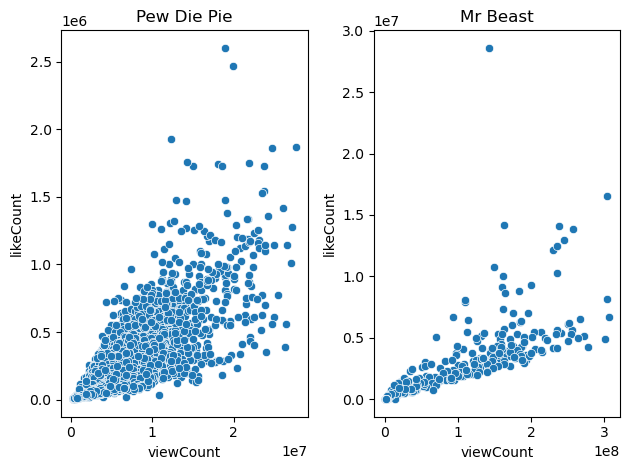

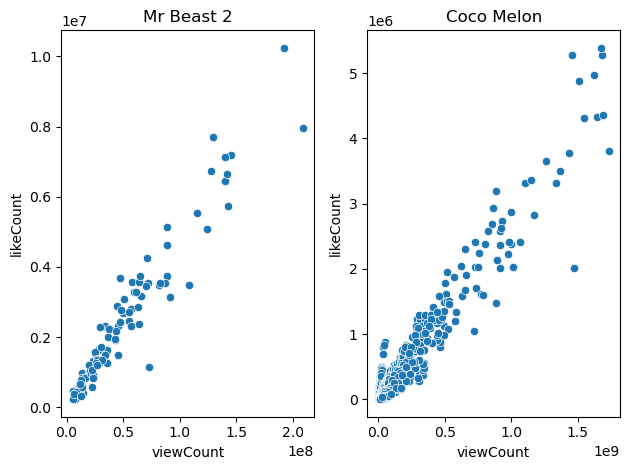

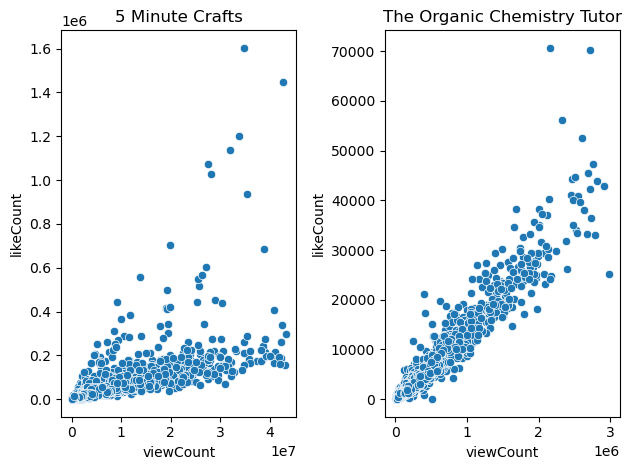

In [52]:
fig0, ax0 = plt.subplots(1, 2)
sns.scatterplot(data=pew_comment, x = 'viewCount', y='likeCount', ax = ax0[0]).set(title='Pew Die Pie')
sns.scatterplot(data=mrbeast_comment, x = 'viewCount', y='likeCount', ax = ax0[1]).set(title='Mr Beast')
fig0.tight_layout()

fig1, ax1 = plt.subplots(1, 2)
sns.scatterplot(data=mrbeast2_comment, x = 'viewCount', y='likeCount', ax = ax1[0]).set(title='Mr Beast 2')
sns.scatterplot(data=coco_comment, x = 'viewCount', y='likeCount', ax = ax1[1]).set(title='Coco Melon')
fig1.tight_layout()

fig2, ax2 = plt.subplots(1, 2)
sns.scatterplot(data=fmin_comment, x = 'viewCount', y='likeCount', ax = ax2[0]).set(title='5 Minute Crafts')
sns.scatterplot(data=org_comment, x = 'viewCount', y='likeCount', ax = ax2[1]).set(title='The Organic Chemistry Tutor')
fig2.tight_layout()

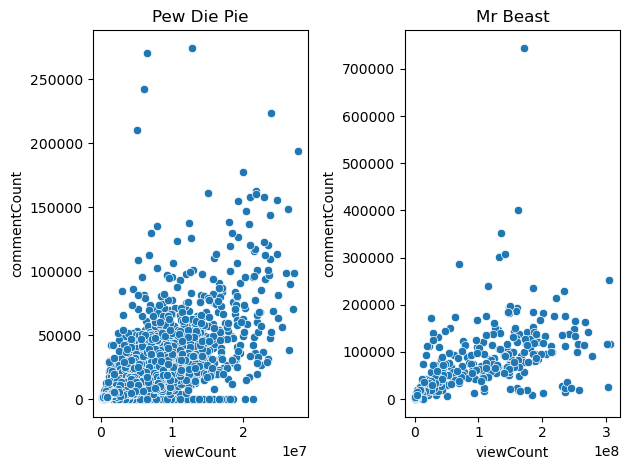

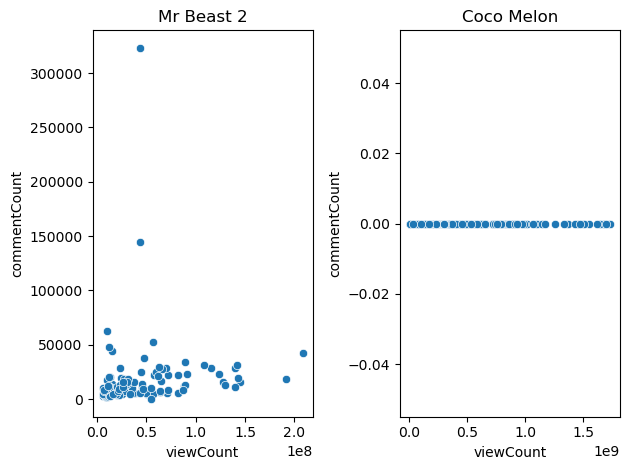

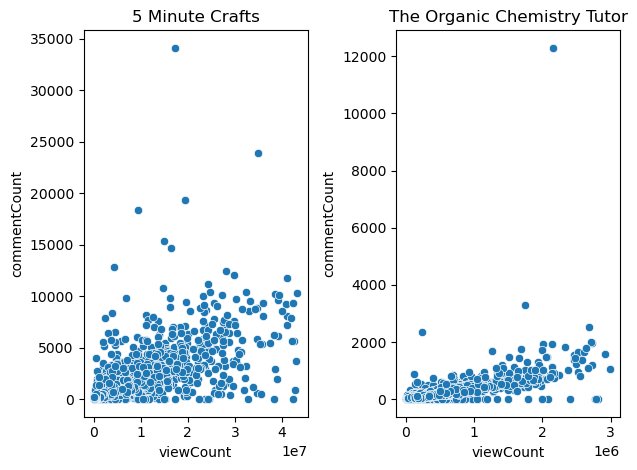

In [53]:
fig0, ax0 = plt.subplots(1, 2)
sns.scatterplot(data=pew_comment, x = 'viewCount', y='commentCount', ax = ax0[0]).set(title='Pew Die Pie')
sns.scatterplot(data=mrbeast_comment, x = 'viewCount', y='commentCount', ax = ax0[1]).set(title='Mr Beast')
fig0.tight_layout()

fig1, ax1 = plt.subplots(1, 2)
sns.scatterplot(data=mrbeast2_comment, x = 'viewCount', y='commentCount', ax = ax1[0]).set(title='Mr Beast 2')
sns.scatterplot(data=coco_comment, x = 'viewCount', y='commentCount', ax = ax1[1]).set(title='Coco Melon')
fig1.tight_layout()

fig2, ax2 = plt.subplots(1, 2)
sns.scatterplot(data=fmin_comment, x = 'viewCount', y='commentCount', ax = ax2[0]).set(title='5 Minute Crafts')
sns.scatterplot(data=org_comment, x = 'viewCount', y='commentCount', ax = ax2[1]).set(title='The Organic Chemistry Tutor')
fig2.tight_layout()

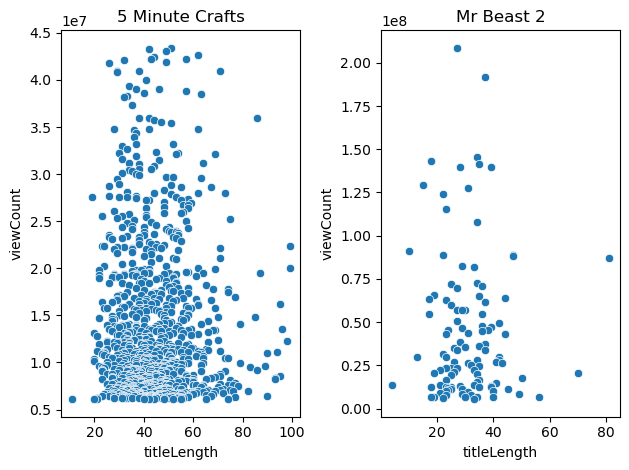

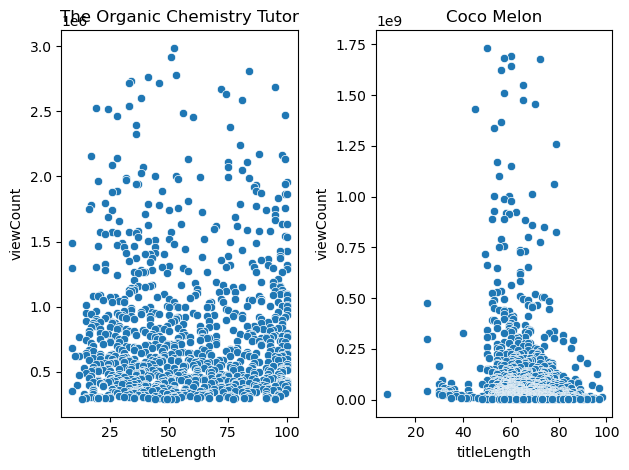

In [12]:
fig0, ax0 = plt.subplots(1, 2)
sns.scatterplot(data=fmin_comment.sort_values('viewCount', ascending = False)[0:1000], x = 'titleLength', y='viewCount', ax = ax0[0]).set(title='5 Minute Crafts')
sns.scatterplot(data=mrbeast2_comment.sort_values('viewCount', ascending = False)[0:1000], x = 'titleLength', y='viewCount', ax = ax0[1]).set(title='Mr Beast 2')
fig0.tight_layout()

fig1, ax1 = plt.subplots(1, 2)
sns.scatterplot(data=org_comment.sort_values('viewCount', ascending = False)[0:1000], x = 'titleLength', y='viewCount', ax = ax1[0]).set(title='The Organic Chemistry Tutor')
sns.scatterplot(data=coco_comment.sort_values('viewCount', ascending = False)[0:1000], x = 'titleLength', y='viewCount', ax = ax1[1]).set(title='Coco Melon')
fig1.tight_layout()

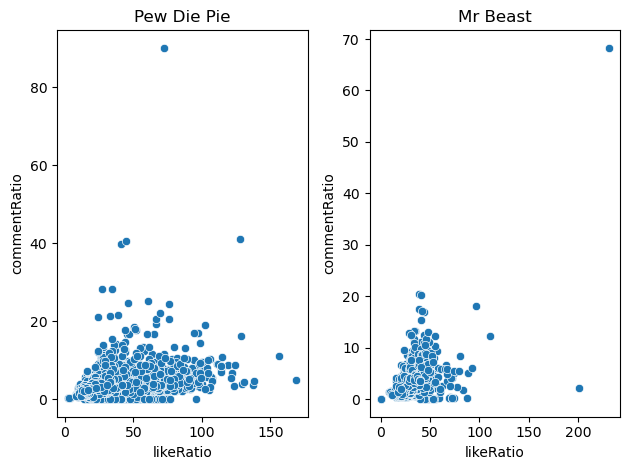

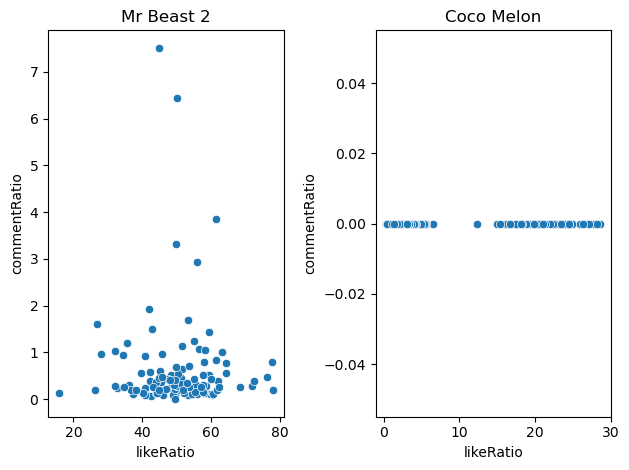

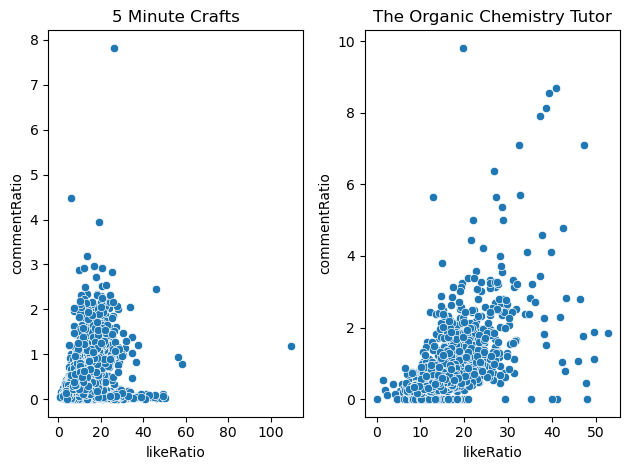

In [13]:
fig0, ax0 = plt.subplots(1, 2)
sns.scatterplot(data=pew_comment, x = 'likeRatio', y='commentRatio', ax = ax0[0]).set(title='Pew Die Pie')
sns.scatterplot(data=mrbeast_comment, x = 'likeRatio', y='commentRatio', ax = ax0[1]).set(title='Mr Beast')
fig0.tight_layout()

fig1, ax1 = plt.subplots(1, 2)
sns.scatterplot(data=mrbeast2_comment, x = 'likeRatio', y='commentRatio', ax = ax1[0]).set(title='Mr Beast 2')
sns.scatterplot(data=coco_comment, x = 'likeRatio', y='commentRatio', ax = ax1[1]).set(title='Coco Melon')
fig1.tight_layout()

fig2, ax2 = plt.subplots(1, 2)
sns.scatterplot(data=fmin_comment, x = 'likeRatio', y='commentRatio', ax = ax2[0]).set(title='5 Minute Crafts')
sns.scatterplot(data=org_comment, x = 'likeRatio', y='commentRatio', ax = ax2[1]).set(title='The Organic Chemistry Tutor')
fig2.tight_layout()

[Text(0.5, 1.0, 'Pew Die Pie')]

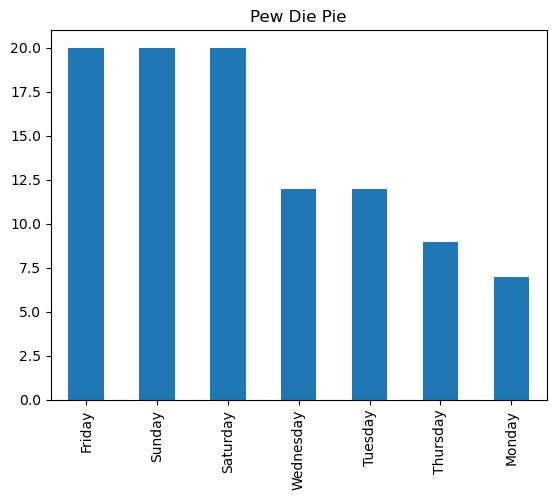

In [14]:
# best 100
most0 = df_pew.sort_values('viewCount', ascending = False)[0:100]
most1 = df_mrbeast.sort_values('viewCount', ascending = False)[0:100]
most2 = df_mrbeast2.sort_values('viewCount', ascending = False)[0:100]
most3 = df_coco.sort_values('viewCount', ascending = False)[0:100]
most4 = df_5min.sort_values('viewCount', ascending = False)[0:100]
most5 = df_org.sort_values('viewCount', ascending = False)[0:100]

most_list = [most0, most1, most2, most3, most4, most5]
most = pd.concat(most_list)

most0['pushblishDayName'].value_counts().plot.bar().set(title='Pew Die Pie')

[Text(0.5, 1.0, 'Mr Beast')]

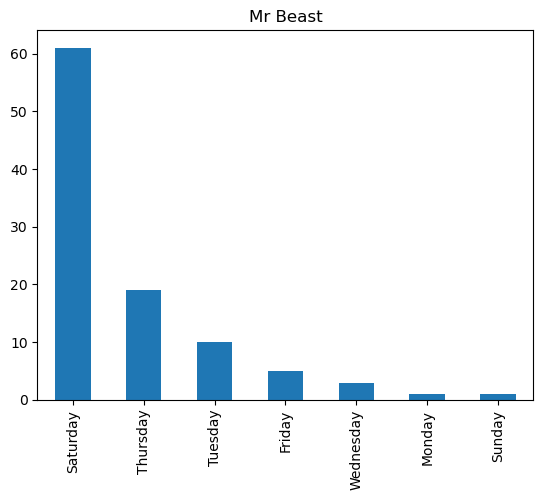

In [15]:
most1['pushblishDayName'].value_counts().plot.bar().set(title='Mr Beast')

[Text(0.5, 1.0, 'Mr Beast 2')]

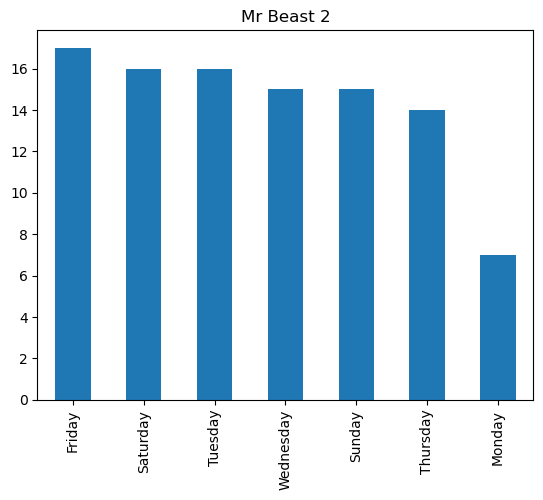

In [16]:
most2['pushblishDayName'].value_counts().plot.bar().set(title='Mr Beast 2')

[Text(0.5, 1.0, 'Coco Melon')]

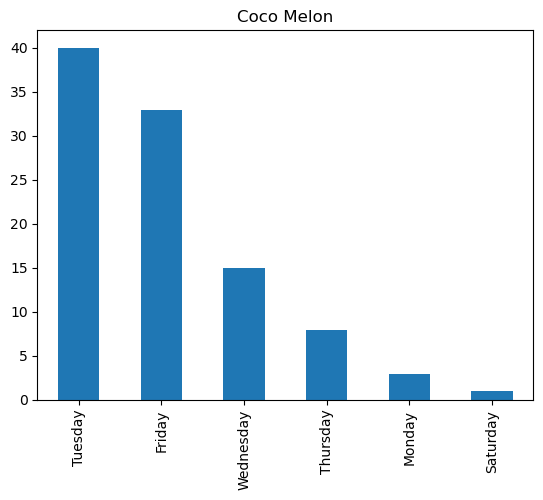

In [17]:
most3['pushblishDayName'].value_counts().plot.bar().set(title='Coco Melon')

[Text(0.5, 1.0, '5 Minute Crafts')]

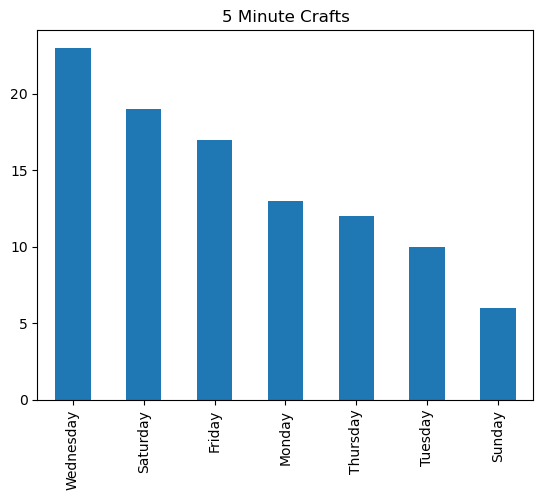

In [18]:
most4['pushblishDayName'].value_counts().plot.bar().set(title='5 Minute Crafts')

[Text(0.5, 1.0, 'The Organic Chemistry Tutor')]

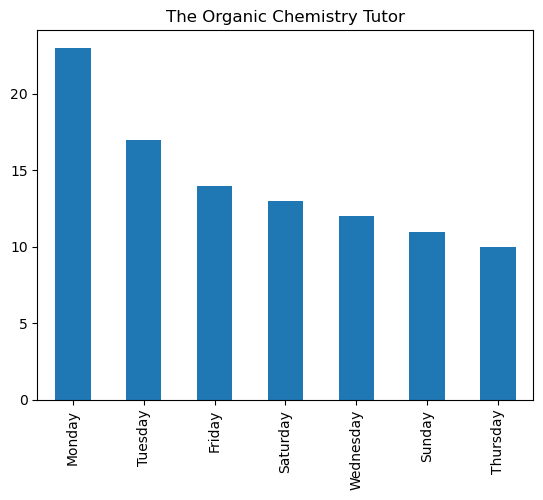

In [19]:
most5['pushblishDayName'].value_counts().plot.bar().set(title='The Organic Chemistry Tutor')

[Text(0.5, 1.0, 'All Channels')]

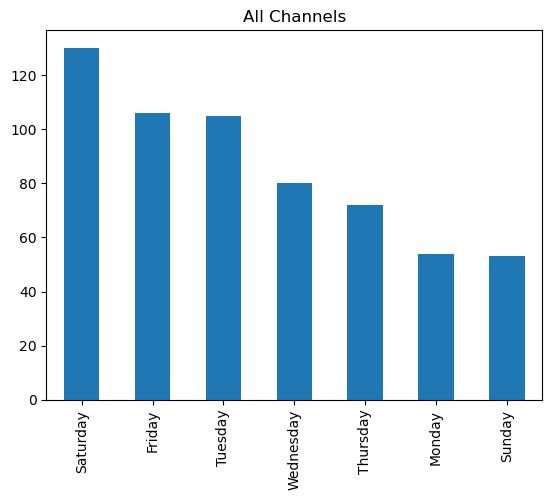

In [20]:
most['pushblishDayName'].value_counts().plot.bar().set(title='All Channels')

[Text(0.5, 1.0, 'Pew Die Pie worst')]

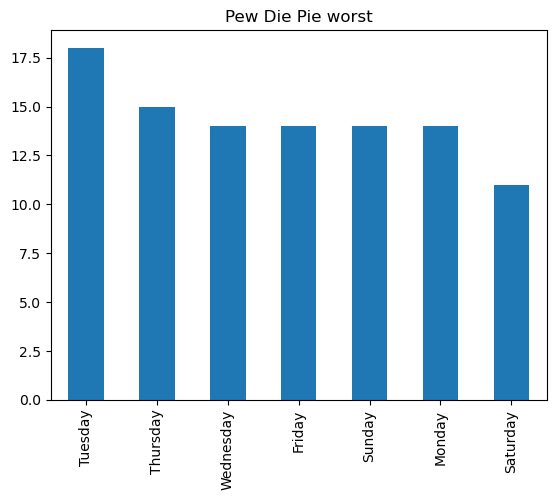

In [21]:
nmost0 = df_pew.sort_values('viewCount', ascending = True)[0:100]
nmost1 = df_mrbeast.sort_values('viewCount', ascending = True)[0:100]
nmost2 = df_mrbeast2.sort_values('viewCount', ascending = True)[0:100]
nmost3 = df_coco.sort_values('viewCount', ascending = True)[0:100]
nmost4 = df_5min.sort_values('viewCount', ascending = True)[0:100]
nmost5 = df_org.sort_values('viewCount', ascending = True)[0:100]

nmost_list = [nmost0, nmost1, nmost2, nmost3, nmost4, nmost5]
nmost = pd.concat(nmost_list)

nmost0['pushblishDayName'].value_counts().plot.bar().set(title='Pew Die Pie worst')

[Text(0.5, 1.0, 'Mr Beast worst')]

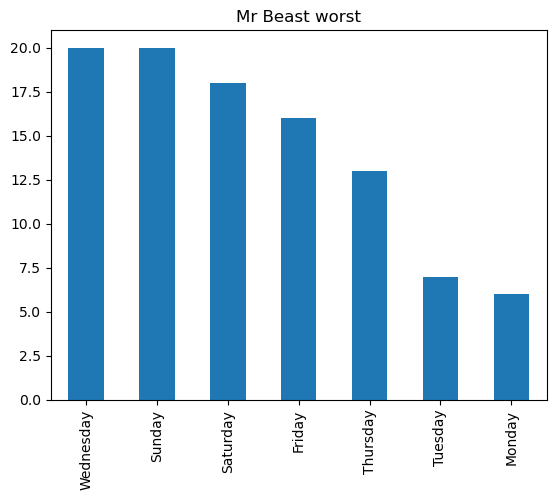

In [22]:
nmost1['pushblishDayName'].value_counts().plot.bar().set(title='Mr Beast worst')

[Text(0.5, 1.0, 'Coco Melon worst')]

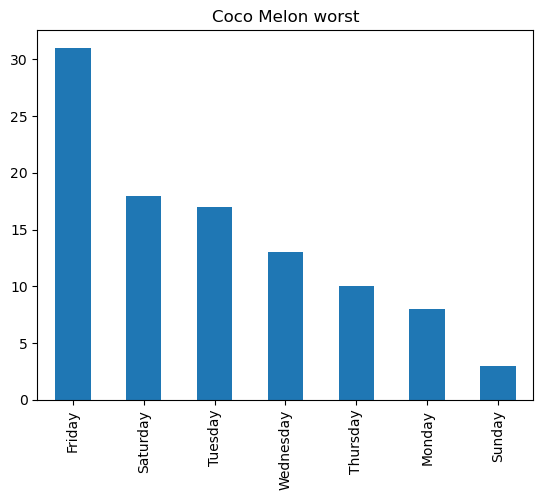

In [23]:
nmost3['pushblishDayName'].value_counts().plot.bar().set(title='Coco Melon worst')

[Text(0.5, 1.0, 'The Organic Chemistry Tutor worst')]

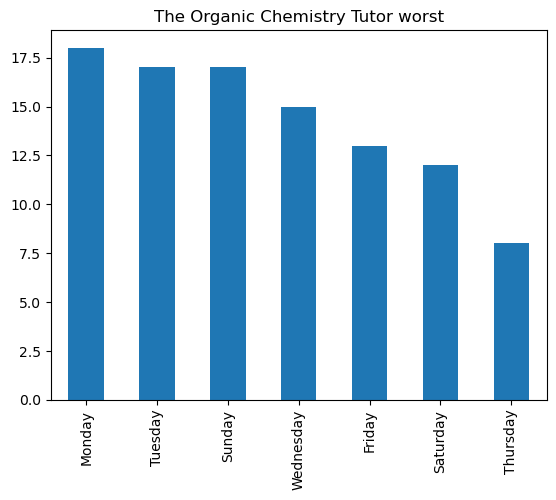

In [24]:
nmost5['pushblishDayName'].value_counts().plot.bar().set(title='The Organic Chemistry Tutor worst')

[Text(0.5, 1.0, 'All Channels')]

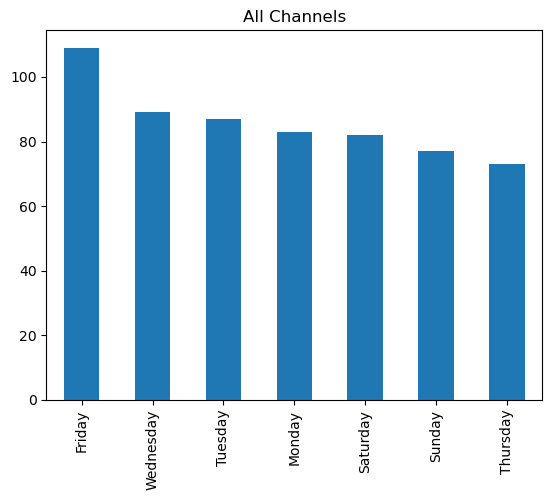

In [25]:
nmost['pushblishDayName'].value_counts().plot.bar().set(title='All Channels')

In [26]:
pew_high = df_pew['viewCount'].quantile(0.99)
pew_low = df_pew['viewCount'].quantile(0.01)
pew_comment = df_pew[(df_pew['viewCount']<pew_high) & (df_pew['viewCount']>pew_low) & (df_pew['viewCount']>50)]

mrbeast_high = df_mrbeast['viewCount'].quantile(0.99)
mrbeast_low = df_mrbeast['viewCount'].quantile(0.01)
mrbeast_comment = df_mrbeast[(df_mrbeast['viewCount']<mrbeast_high) & (df_mrbeast['viewCount']>mrbeast_low) & (df_mrbeast['viewCount']>50)]

mrbeast2_high = df_mrbeast2['viewCount'].quantile(0.99)
mrbeast2_low = df_mrbeast2['viewCount'].quantile(0.01)
mrbeast2_comment = df_mrbeast2[(df_mrbeast2['viewCount']<mrbeast2_high) & (df_mrbeast2['viewCount']>mrbeast2_low) & (df_mrbeast2['viewCount']>50)]

coco_high = df_coco['viewCount'].quantile(0.99)
coco_low = df_coco['viewCount'].quantile(0.01)
coco_comment = df_coco[(df_coco['viewCount']<coco_high) & (df_coco['viewCount']>coco_low) & (df_coco['viewCount']>50)]

fmin_high = df_5min['viewCount'].quantile(0.99)
fmin_low = df_5min['viewCount'].quantile(0.01)
fmin_comment = df_5min[(df_5min['viewCount']<fmin_high) & (df_5min['viewCount']>fmin_low) & (df_5min['viewCount']>50)]

org_high = df_org['viewCount'].quantile(0.99)
org_low = df_org['viewCount'].quantile(0.01)
org_comment = df_org[(df_org['viewCount']<org_high) & (df_org['viewCount']>org_low) & (df_org['viewCount']>50)]

boom_high = df_boom['viewCount'].quantile(0.99)
boom_low = df_boom['viewCount'].quantile(0.01)
boom_comment = df_boom[(df_boom['viewCount']<boom_high) & (df_boom['viewCount']>boom_low) & (df_boom['viewCount']>50)]

allchan_list = [pew_comment, mrbeast_comment, mrbeast2_comment, fmin_comment, org_comment, boom_comment]
allchan = pd.concat(allchan_list)

In [27]:
org_comment = org_comment.dropna(axis=1, how='all')
org_comment = org_comment.dropna(axis=0)

X = org_comment.select_dtypes(exclude=['object'])
X = X.drop(['Unnamed: 0', 'caption', 'likeCount', 'commentCount', 'likeRatio', 'commentRatio', 'titleLength', 'durationSecs'], axis=1)
y = org_comment['likeCount']

model0 = LinearRegression()
model0.fit(X, y)

print("sklearn intercept: ", model0.intercept_, "\nsklearn R^2\t : ", model0.score(X,y))

z = sm.add_constant(X)
model1 = sm.OLS(y.astype(float), z.astype(float)).fit()

print("\n", model1.summary(alpha=0.1))

# https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.RegressionResults.scale.html#statsmodels.regression.linear_model.RegressionResults.scale
print(model1.scale)


sklearn intercept:  75.66693325684992 
sklearn R^2	 :  0.9220315749078891

                             OLS Regression Results                            
Dep. Variable:              likeCount   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                 1.489e+04
Date:                Tue, 28 Nov 2023   Prob (F-statistic):               0.00
Time:                        12:50:21   Log-Likelihood:                -22785.
No. Observations:                2522   AIC:                         4.558e+04
Df Residuals:                    2519   BIC:                         4.559e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|       [0.05       0.95]
-------------------------------------------------------

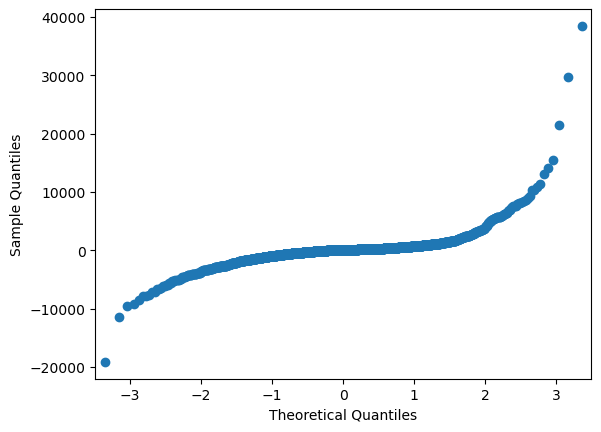

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,
          0.,   1.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   2.,   1.,
          0.,   0.,   0.,   2.,   2.,   0.,   0.,   1.,   1.,   0.,   3.,
          4.,   1.,   0.,   1.,   2.,   3.,   2.,   1.,   5.,   7.,   2.,
          5.,   2.,   2.,   1.,   8.,   8.,   6.,   5.,   9.,   8.,  12.,
         13.,   7.,   7.,  11.,  13., 

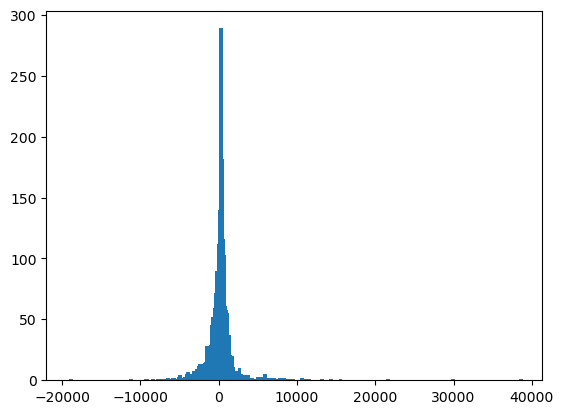

In [28]:
##your code goes here
#res = model1.resid
fig = statsmodels.graphics.gofplots.ProbPlot(model1.resid)
plot = fig.qqplot()
plt.show()
plt.hist(model1.resid, bins = 500, width = 500)

In [29]:
##your code goes here
X_df = pd.DataFrame(X)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
vif["Feature"] = X_df.columns
vif

,VIF Factor,Feature
0,1.584713,viewCount
1,1.584713,tagsCount


In [30]:
org_comment = org_comment.dropna(axis=1, how='all')
org_comment = org_comment.dropna(axis=0)

X = org_comment.select_dtypes(exclude=['object'])
X = X.drop(['Unnamed: 0', 'caption', 'likeCount', 'commentCount', 'likeCount', 'likeRatio', 'commentRatio', 'titleLength', 'durationSecs'], axis=1)
y = org_comment['commentCount']

model0 = LinearRegression()
model0.fit(X, y)

print("sklearn intercept: ", model0.intercept_, "\nsklearn R^2\t : ", model0.score(X,y))

z = sm.add_constant(X)
model1 = sm.OLS(y.astype(float), z.astype(float)).fit()

print("\n", model1.summary(alpha=0.1))

# https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.RegressionResults.scale.html#statsmodels.regression.linear_model.RegressionResults.scale
print(model1.scale)

sklearn intercept:  4.312435661791767 
sklearn R^2	 :  0.3944958420949558

                             OLS Regression Results                            
Dep. Variable:           commentCount   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     820.6
Date:                Tue, 28 Nov 2023   Prob (F-statistic):          3.77e-275
Time:                        12:50:22   Log-Likelihood:                -17693.
No. Observations:                2522   AIC:                         3.539e+04
Df Residuals:                    2519   BIC:                         3.541e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|       [0.05       0.95]
-------------------------------------------------------

In [31]:
##your code goes here
X_df = pd.DataFrame(X)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
vif["Feature"] = X_df.columns
vif

,VIF Factor,Feature
0,1.584713,viewCount
1,1.584713,tagsCount


# ORG above, 5 min craft below

In [32]:
fmin_comment = fmin_comment.dropna(axis=1, how='all')
fmin_comment = fmin_comment.dropna(axis=0)

X = fmin_comment.select_dtypes(exclude=['object'])
X = X.drop(['Unnamed: 0', 'caption', 'likeCount', 'commentCount', 'likeRatio', 'commentRatio', 'titleLength', 'durationSecs'], axis=1)
y = fmin_comment['likeCount']

model0 = LinearRegression()
model0.fit(X, y)

print("sklearn intercept: ", model0.intercept_, "\nsklearn R^2\t : ", model0.score(X,y))

z = sm.add_constant(X)
model1 = sm.OLS(y.astype(float), z.astype(float)).fit()

print("\n", model1.summary(alpha=0.1))

# https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.RegressionResults.scale.html#statsmodels.regression.linear_model.RegressionResults.scale
print(model1.scale)


sklearn intercept:  14639.184626030348 
sklearn R^2	 :  0.5277155778093636

                             OLS Regression Results                            
Dep. Variable:              likeCount   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     3422.
Date:                Tue, 28 Nov 2023   Prob (F-statistic):               0.00
Time:                        12:50:22   Log-Likelihood:                -73847.
No. Observations:                6128   AIC:                         1.477e+05
Df Residuals:                    6125   BIC:                         1.477e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|       [0.05       0.95]
------------------------------------------------------

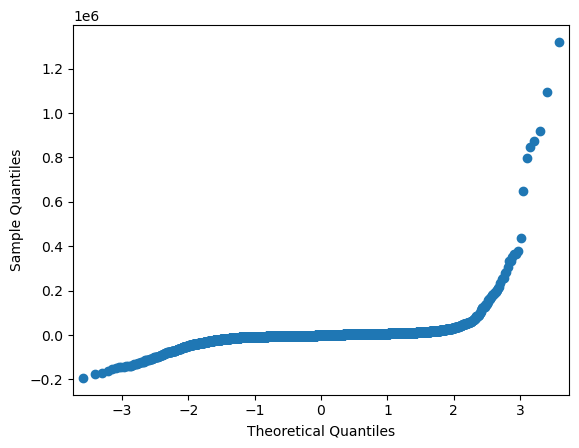

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 3.000e+00, 1.000e+00,
        3.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 2.000e+00,
        2.000e+00, 1.000e+00, 3.000e+00, 4.000e+00, 3.000e+00, 2.000e+00,
        3.000e+00, 5.000e+00, 3.000e+00, 0.000e+00, 7.000e+00, 1.000e+00,
        3.000e+00, 5.000e+00, 7.000e+00, 9.000e+00, 7.000e+00, 6.000e+00,
        7.000e+00, 8.000e+00, 3.000e+00, 8.000e+00, 1.400e+01, 7.000e+00,
        1.600e+01, 1.700e+01, 2.000e+01, 2.300e+01, 2.700e+01, 2.600e+01,
        3.200e+01, 4.200e+01, 5.300e+01, 6.100e+01, 8.900e+01, 1.120e+02,
        2.230e+02, 1.025e+03, 8.920e+02, 6.070e+02, 8.680e+02, 8.530e+02,
        4.090e+02, 1.870e+02, 9.300e+01, 6.000e+01, 4.800e+01, 2.100e+01,
        2.600e+01, 1.700e+01, 1.000e+01, 1.100e+01, 7.000e+00, 8.000e+00,
        4.000e+00, 4.000e+00, 1.100e+0

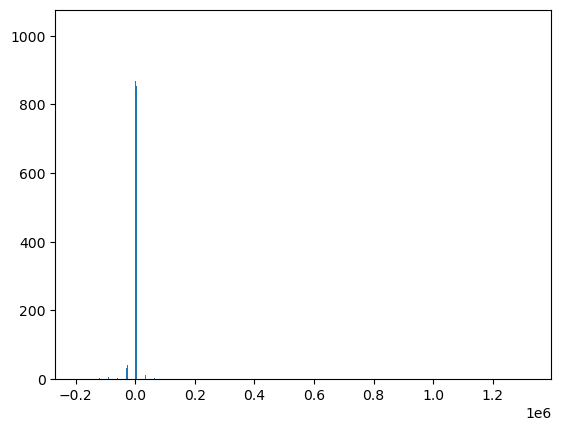

In [33]:
##your code goes here
#res = model1.resid
fig = statsmodels.graphics.gofplots.ProbPlot(model1.resid)
plot = fig.qqplot()
plt.show()
plt.hist(model1.resid, bins = 500, width = 500)

In [34]:
##your code goes here
X_df = pd.DataFrame(X)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
vif["Feature"] = X_df.columns
vif

,VIF Factor,Feature
0,1.402374,viewCount
1,1.402374,tagsCount


In [35]:
fmin_comment = fmin_comment.dropna(axis=1, how='all')
fmin_comment = fmin_comment.dropna(axis=0)

X = fmin_comment.select_dtypes(exclude=['object'])
X = X.drop(['Unnamed: 0', 'caption', 'likeCount', 'commentCount', 'likeCount', 'likeRatio', 'commentRatio', 'titleLength', 'durationSecs'], axis=1)
y = fmin_comment['commentCount']

model0 = LinearRegression()
model0.fit(X, y)

print("sklearn intercept: ", model0.intercept_, "\nsklearn R^2\t : ", model0.score(X,y))

z = sm.add_constant(X)
model1 = sm.OLS(y.astype(float), z.astype(float)).fit()

print("\n", model1.summary(alpha=0.1))

# https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.RegressionResults.scale.html#statsmodels.regression.linear_model.RegressionResults.scale
print(model1.scale)

sklearn intercept:  -185.84641141056738 
sklearn R^2	 :  0.5391921172732439

                             OLS Regression Results                            
Dep. Variable:           commentCount   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     3583.
Date:                Tue, 28 Nov 2023   Prob (F-statistic):               0.00
Time:                        12:50:23   Log-Likelihood:                -50850.
No. Observations:                6128   AIC:                         1.017e+05
Df Residuals:                    6125   BIC:                         1.017e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|       [0.05       0.95]
-----------------------------------------------------

In [36]:
##your code goes here
X_df = pd.DataFrame(X)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
vif["Feature"] = X_df.columns
vif

,VIF Factor,Feature
0,1.402374,viewCount
1,1.402374,tagsCount


# all chan below

In [43]:
allchan = allchan.dropna(axis=1, how='all')
allchan = allchan.dropna(axis=0)

X = allchan.select_dtypes(exclude=['object'])
X = X.drop(['Unnamed: 0', 'caption', 'likeCount', 'commentCount', 'likeRatio', 'commentRatio', 'titleLength'], axis=1)
y = allchan['likeCount']

model0 = LinearRegression()
model0.fit(X, y)

print("sklearn intercept: ", model0.intercept_, "\nsklearn R^2\t : ", model0.score(X,y))

z = sm.add_constant(X)
model1 = sm.OLS(y.astype(float), z.astype(float)).fit()

print("\n", model1.summary(alpha=0.1))

# https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.RegressionResults.scale.html#statsmodels.regression.linear_model.RegressionResults.scale
print(model1.scale)


sklearn intercept:  90198.9848186165 
sklearn R^2	 :  0.8254645701719777

                             OLS Regression Results                            
Dep. Variable:              likeCount   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                 3.240e+04
Date:                Tue, 28 Nov 2023   Prob (F-statistic):               0.00
Time:                        13:02:38   Log-Likelihood:            -1.8424e+05
No. Observations:               13706   AIC:                         3.685e+05
Df Residuals:                   13703   BIC:                         3.685e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|       [0.05       0.95]
--------------------------------------------------------

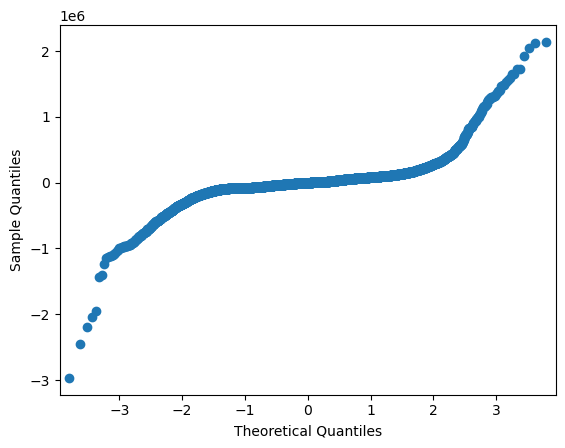

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

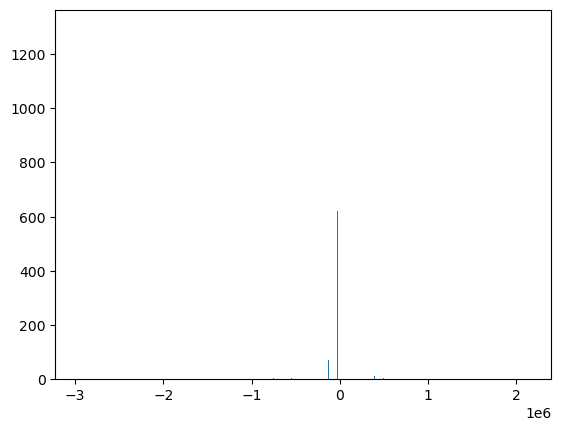

In [44]:
##your code goes here
#res = model1.resid
fig = statsmodels.graphics.gofplots.ProbPlot(model1.resid)
plot = fig.qqplot()
plt.show()
plt.hist(model1.resid, bins = 500, width = 500)

In [45]:
##your code goes here
X_df = pd.DataFrame(X)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
vif["Feature"] = X_df.columns
vif

,VIF Factor,Feature
0,1.08362,viewCount
1,1.08362,tagsCount


In [46]:
allchan = allchan.dropna(axis=1, how='all')
allchan = allchan.dropna(axis=0)

X = allchan.select_dtypes(exclude=['object'])
X = X.drop(['Unnamed: 0', 'caption', 'likeCount', 'commentCount', 'likeCount', 'likeRatio', 'commentRatio', 'titleLength'], axis=1)
y = allchan['commentCount']

model0 = LinearRegression()
model0.fit(X, y)

print("sklearn intercept: ", model0.intercept_, "\nsklearn R^2\t : ", model0.score(X,y))

z = sm.add_constant(X)
model1 = sm.OLS(y.astype(float), z.astype(float)).fit()

print("\n", model1.summary(alpha=0.1))

# https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.RegressionResults.scale.html#statsmodels.regression.linear_model.RegressionResults.scale
print(model1.scale)

sklearn intercept:  10080.657734056507 
sklearn R^2	 :  0.14838983383734572

                             OLS Regression Results                            
Dep. Variable:           commentCount   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     1194.
Date:                Tue, 28 Nov 2023   Prob (F-statistic):               0.00
Time:                        13:02:43   Log-Likelihood:            -1.5515e+05
No. Observations:               13706   AIC:                         3.103e+05
Df Residuals:                   13703   BIC:                         3.103e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|       [0.05       0.95]
-----------------------------------------------------

In [47]:
##your code goes here
X_df = pd.DataFrame(X)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
vif["Feature"] = X_df.columns
vif

,VIF Factor,Feature
0,1.08362,viewCount
1,1.08362,tagsCount
